<a href="https://colab.research.google.com/github/xsebet/AluraStoreLatam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [64]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



## Ingreso total por cada tienda
En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [65]:
total_tienda1 = round(tienda['Precio'].sum())
total_tienda2 = round(tienda2['Precio'].sum())
total_tienda3 = round(tienda3['Precio'].sum())
total_tienda4 = round(tienda4['Precio'].sum())

df_ingresos_totales = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso total': [total_tienda1, total_tienda2, total_tienda3, total_tienda4]})

display(df_ingresos_totales.style.hide(axis="index"))

Tienda,Ingreso total
Tienda 1,1150880400
Tienda 2,1116343500
Tienda 3,1098019600
Tienda 4,1038375700


## Grafico

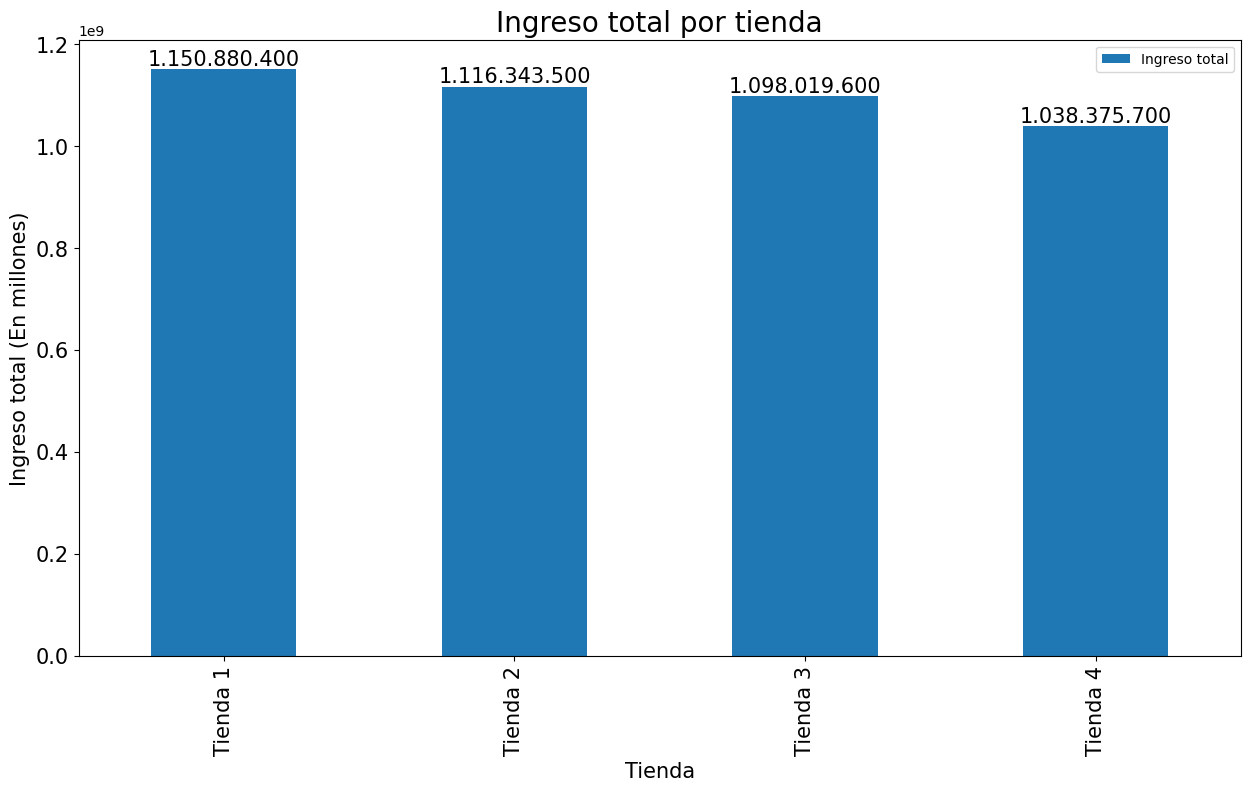

In [105]:
grafico_total_ingreso = df_ingresos_totales.plot(kind='bar',
                                            x='Tienda',
                                            y='Ingreso total',
                                            figsize=(15,8),
                                            xlabel='Tienda',
                                            ylabel='Ingreso total (En millones)',
                                            title='Ingreso total por tienda',
                                            fontsize=15)

grafico_total_ingreso.set_title('Ingreso total por tienda', fontsize=20)
grafico_total_ingreso.set_xlabel('Tienda', fontsize=15)
grafico_total_ingreso.set_ylabel('Ingreso total (En millones)', fontsize=15)


# Agregar las etiquetas de ingreso total a las barras
for i, v in enumerate(df_ingresos_totales['Ingreso total']):
    # Itera sobre cada barra del gráfico
    # i: índice de la barra (0 para la primera barra, 1 para la segunda, etc.)
    # v: el valor de la barra (el ingreso total de la tienda)
    grafico_total_ingreso.text(i, # Posición horizontal de la etiqueta (centro de la barra)
                               v, # Posición vertical de la etiqueta (arriba de la barra)
                               f'{v:,.0f}'.replace(',', '.'), # Formato del texto: muestra el valor con separador de miles y sin decimales
                               ha='center', # Alineación horizontal: centrado sobre la barra
                               va='bottom', # Alineación vertical: en la parte inferior del texto (para que quede arriba de la barra)
                               fontsize=15) # Tamaño de la fuente de la etiqueta

# 2. Ventas por categoría

## Ventas por categoría
En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [107]:
categoria_tienda1 = tienda['Categoría del Producto'].value_counts().rename_axis('Categoría del Producto').reset_index(name='Cantidad de ventas')
categoria_tienda2 = tienda2['Categoría del Producto'].value_counts().rename_axis('Categoría del Producto').reset_index(name='Cantidad de ventas')
categoria_tienda3 = tienda3['Categoría del Producto'].value_counts().rename_axis('Categoría del Producto').reset_index(name='Cantidad de ventas')
categoria_tienda4 = tienda4['Categoría del Producto'].value_counts().rename_axis('Categoría del Producto').reset_index(name='Cantidad de ventas')

print("Ventas por categoría - Tienda 1:")
display(categoria_tienda1)

print("\nVentas por categoría - Tienda 2:")
display(categoria_tienda2)

print("\nVentas por categoría - Tienda 3:")
display(categoria_tienda3)

print("\nVentas por categoría - Tienda 4:")
display(categoria_tienda4)

Ventas por categoría - Tienda 1:


,Categoría del Producto,Cantidad de ventas
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171



Ventas por categoría - Tienda 2:


,Categoría del Producto,Cantidad de ventas
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181



Ventas por categoría - Tienda 3:


,Categoría del Producto,Cantidad de ventas
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Instrumentos musicales,177
7,Artículos para el hogar,177



Ventas por categoría - Tienda 4:


,Categoría del Producto,Cantidad de ventas
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


## Gráficos de ventas por categoría

A continuación, se muestran los gráficos circulares para cada tienda, visualizando la proporción de ventas por categoría de producto.

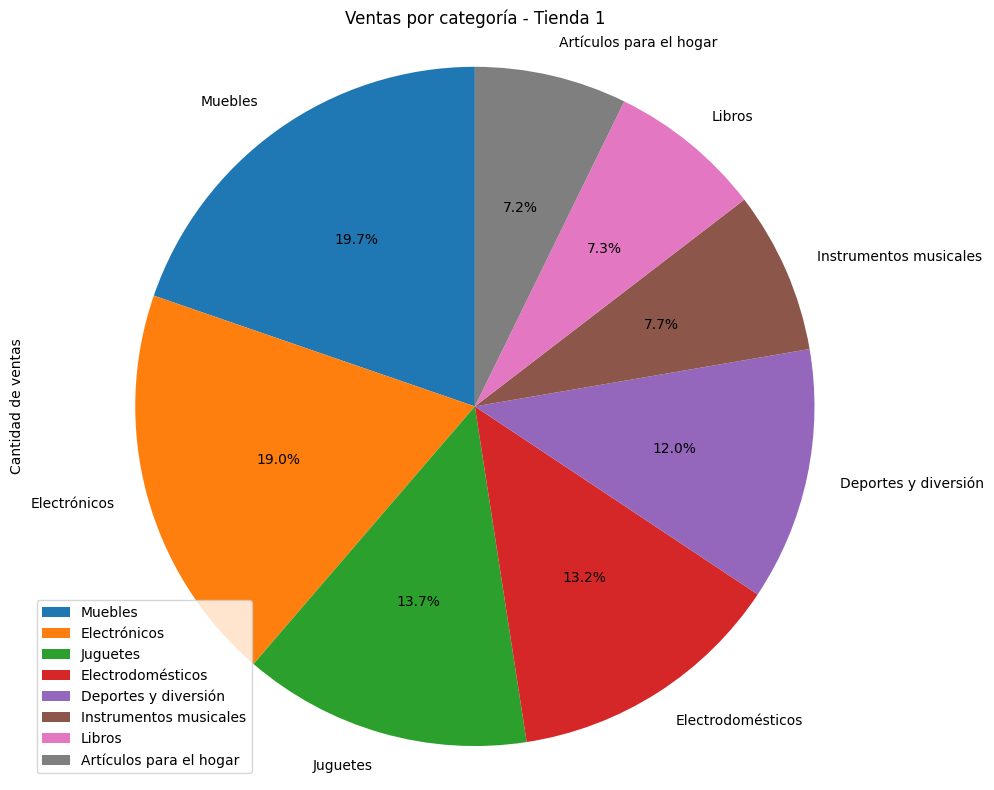

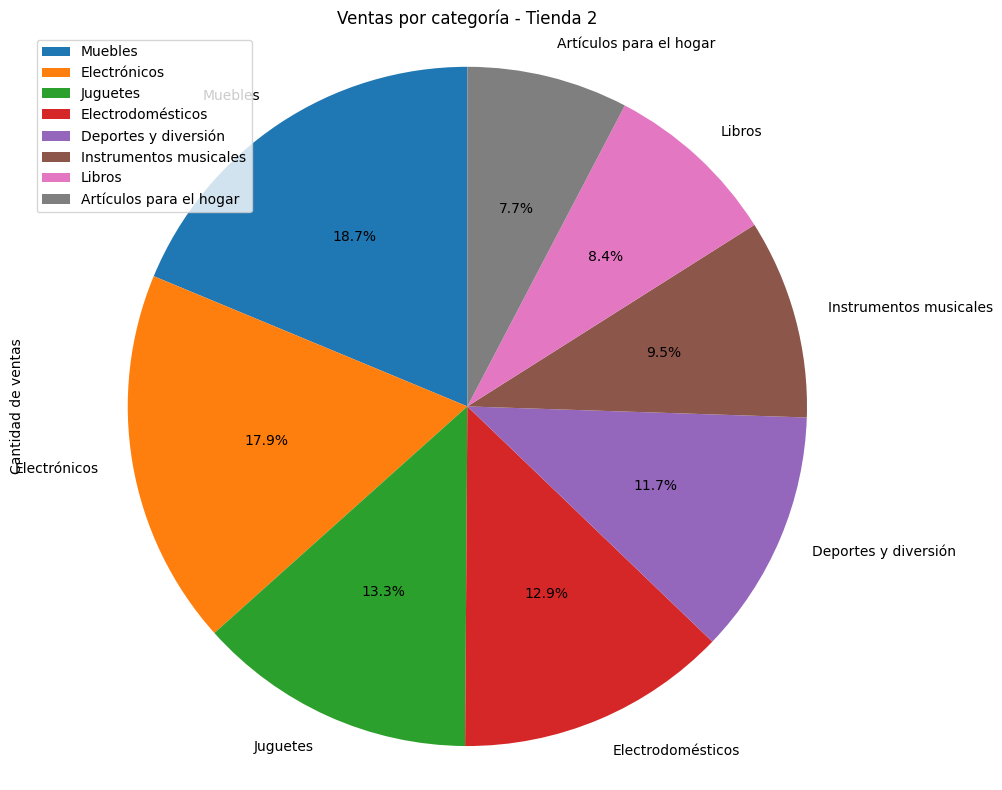

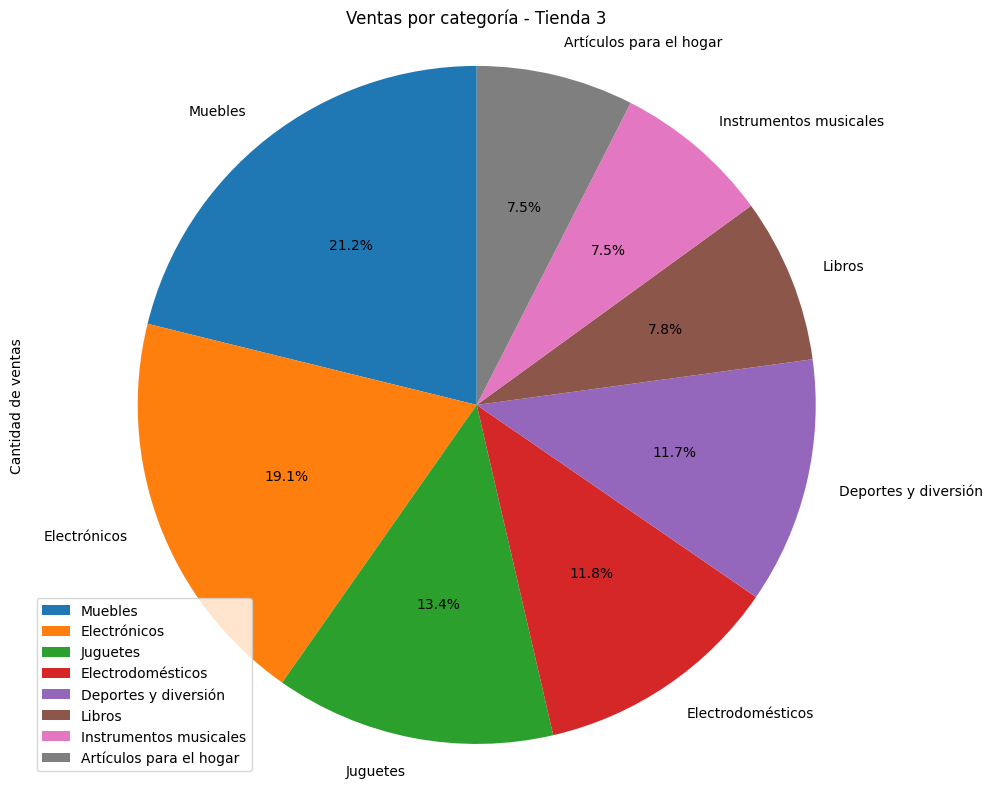

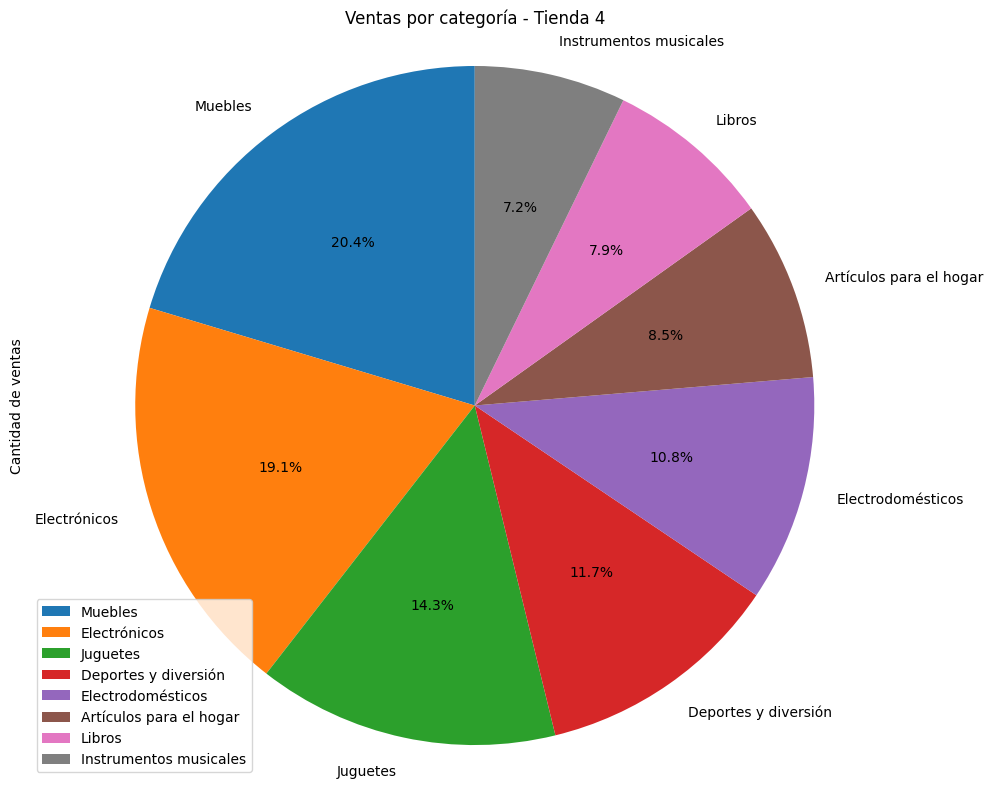

In [111]:
import matplotlib.pyplot as plt

# Generar gráficos para cada tienda utilizando pandas plotting
categoria_tienda1.plot(kind='pie', y='Cantidad de ventas', labels=categoria_tienda1['Categoría del Producto'], autopct='%1.1f%%', startangle=90, figsize=(10, 8), title='Ventas por categoría - Tienda 1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Add space between plots
plt.show()

categoria_tienda2.plot(kind='pie', y='Cantidad de ventas', labels=categoria_tienda2['Categoría del Producto'], autopct='%1.1f%%', startangle=90, figsize=(10, 8), title='Ventas por categoría - Tienda 2')
plt.axis('equal')
plt.tight_layout() # Add space between plots
plt.show()

categoria_tienda3.plot(kind='pie', y='Cantidad de ventas', labels=categoria_tienda3['Categoría del Producto'], autopct='%1.1f%%', startangle=90, figsize=(10, 8), title='Ventas por categoría - Tienda 3')
plt.axis('equal')
plt.tight_layout() # Add space between plots
plt.show()

categoria_tienda4.plot(kind='pie', y='Cantidad de ventas', labels=categoria_tienda4['Categoría del Producto'], autopct='%1.1f%%', startangle=90, figsize=(10, 8), title='Ventas por categoría - Tienda 4')
plt.axis('equal')
plt.tight_layout() # Add space between plots
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda